In [1]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.sentiment import SentimentIntensityAnalyzer

ModuleNotFoundError: No module named 'nltk'

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv('sentimentdataset.csv')
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Timestamp', 'Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)

In [4]:
positive_words = ['Positive','joy', 'excitement', 'contentment', 'gratitude',
                  'curiosity', 'serenity', 'happy', 'nostalgia', 'awe',
                  'hopeful', 'acceptance', 'euphoria', 'elation',
                  'enthusiasm', 'pride', 'determination', 'playful',
                  'inspiration', 'hope', 'happiness', 'inspired',
                  'empowerment', 'proud', 'grateful', 'thrill',
                  'compassionate', 'enchantment', 'admiration', 'calmness',
                  'reverence', 'fulfillment', 'compassion', 'arousal',
                  'tenderness', 'amusement', 'anticipation', 'adventure',
                  'satisfaction', 'wonder', 'accomplishment', 'creativity',
                  'harmony', 'kind', 'love', 'confident', 'free-spirited',
                  'empathetic', 'exploration', 'captivation', 'tranquility',
                  'radiance', 'rejuvenation', 'resilience', 'coziness',
                  'whimsy', 'zest', 'yearning', 'enjoyment', 'adoration',
                  'affection', 'engagement', 'heartwarming', 'triumph',
                  'touched', 'runway creativity', 'sympathy', 'iconic',
                  'connection', 'hypnotic', 'colorful', 'ecstasy',
                  'charm', 'journey', "ocean's freedom", 'relief',
                  'creative inspiration', 'celestial wonder', "nature's beauty",
                  'thrilling journey', 'winter magic', 'culinary adventure',
                  'mesmerizing', 'vibrancy', 'imagination',
                  'envisioning history', 'joy in baking', 'breakthrough',
                  'solace', 'celebration', 'renewed effort', 'challenge',
                  'mindfulness', 'energy', 'melodic', 'motivation',
                  'culinaryodyssey', 'artisticburst', 'adrenaline',
                  'dazzle', 'freedom', 'innerjourney', 'festivejoy',
                  'joyfulreunion', 'grandeur', 'blessed', 'appreciation',
                  'confidence', 'wonderment', 'optimism', 'playfuljoy',
                  'elegance', 'immersion', 'spark', 'marvel', 'overjoyed',
                  'dreamchaser', 'romance', 'amazement', 'success',
                  'friendship', 'kindness', 'positivity']

neutral_words = ['neutral', 'ambivalence', 'surprise', 'reflection',
                 'boredom', 'contemplation', 'emotion', 'intimidation',
                 'wonder', 'suspense', 'whispers of the past', 'pensive',
                 'solitude']

negative_words = ['despair', 'grief', 'sad', 'loneliness', 'embarrassed',
                  'confusion', 'regret', 'frustration', 'melancholy',
                  'numbness', 'bad', 'hate', 'bitterness', 'frustrated',
                  'betrayal', 'disgust', 'overwhelmed', 'desolation',
                  'negative', 'envious', 'dismissive', 'bitter',
                  'heartbreak', 'devastated', 'jealous', 'shame',
                  'jealousy', 'sorrow', 'loss', 'mischievous',
                  'disappointment', 'isolation', 'anxiety', 'helplessness',
                  'envy', 'anger', 'fear', 'sadness', 'disappointed',
                  'obstacle', 'pressure', 'miscalculation', 'heartache',
                  'ruins', 'desperation', 'darkness', 'exhaustion',
                  'lostlove', 'emotionalstorm', 'suffering', 'bittersweet',
                  'intrigue', 'apprehensive', 'fear', 'sadness']

In [5]:
def categorize_sentiment(text):
    text = str(text).lower()
    if any(word in text for word in positive_words):
        return 'Positive'
    elif any(word in text for word in negative_words):
        return 'Negative'
    elif any(word in text for word in neutral_words):
        return 'Neutral'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment'].apply(categorize_sentiment)

In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
sid = SentimentIntensityAnalyzer()

In [7]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

df['Text'] = df['Text'].apply(preprocess_text)

In [8]:
def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

df['VADER_Sentiment'] = df['Text'].apply(get_vader_sentiment)

In [9]:
dict_val = {'Positive': 0, 'Negative': 1, 'Neutral': 2}
df['Sentiment'] = df['Sentiment'].map(dict_val)
X = df['Text']
y = df['Sentiment']

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
print(f"Logistic Regression F1 Score: {f1_score(y_test, y_pred_lr, average='weighted')}")

Logistic Regression F1 Score: 0.6146963289820433


In [12]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f"SVM F1 Score: {f1_score(y_test, y_pred_svm, average='weighted')}")

SVM F1 Score: 0.7392918078571767


In [13]:
cv_scores_lr = cross_val_score(LR, X, y, cv=5, scoring='f1_weighted')
print(f"Logistic Regression Cross-Validation F1 Scores: {cv_scores_lr}")
print(f"Average Logistic Regression F1 Score: {np.mean(cv_scores_lr)}")

Logistic Regression Cross-Validation F1 Scores: [0.59119098 0.5986541  0.64396608 0.5819573  0.45849432]
Average Logistic Regression F1 Score: 0.5748525565898646


In [14]:
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5, scoring='f1_weighted')
print(f"SVM Cross-Validation F1 Scores: {cv_scores_svm}")
print(f"Average SVM F1 Score: {np.mean(cv_scores_svm)}")

SVM Cross-Validation F1 Scores: [0.74255893 0.74599558 0.76591491 0.77276126 0.5146614 ]
Average SVM F1 Score: 0.7083784172853548


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

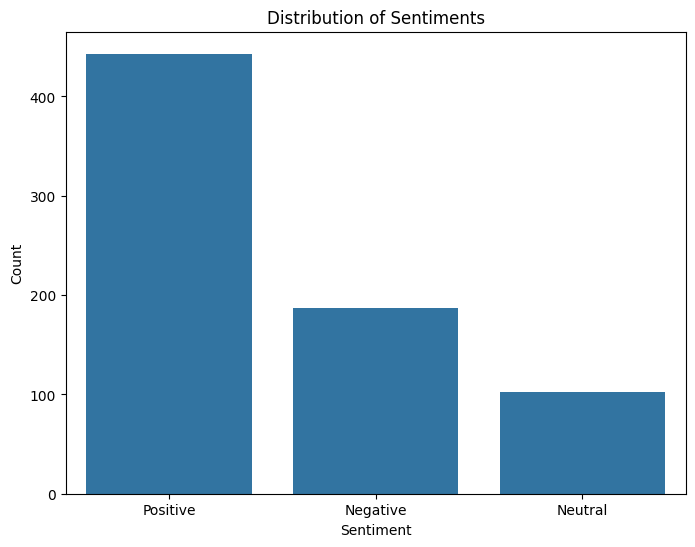

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xticks([0, 1, 2], ['Positive', 'Negative', 'Neutral'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix

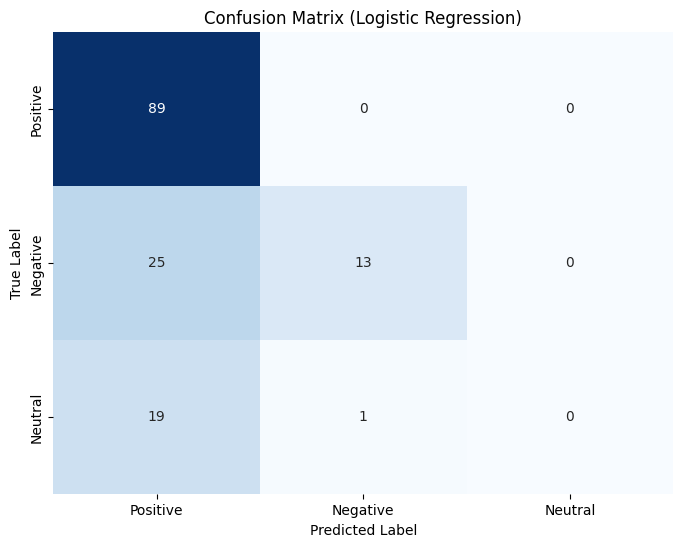

In [18]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

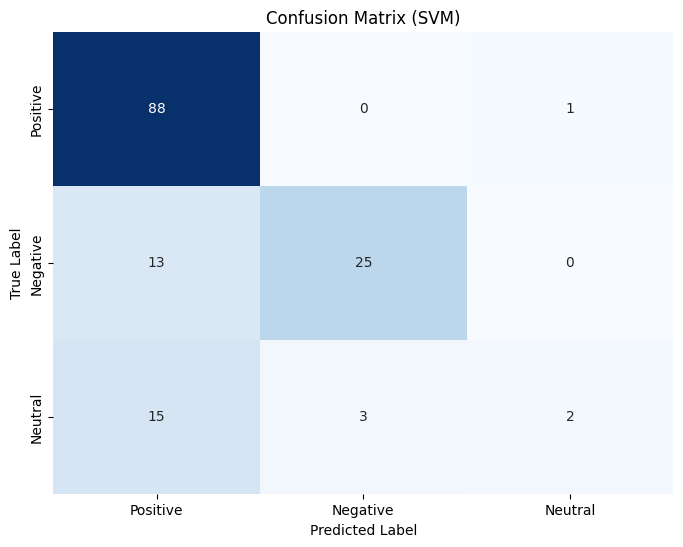

In [19]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

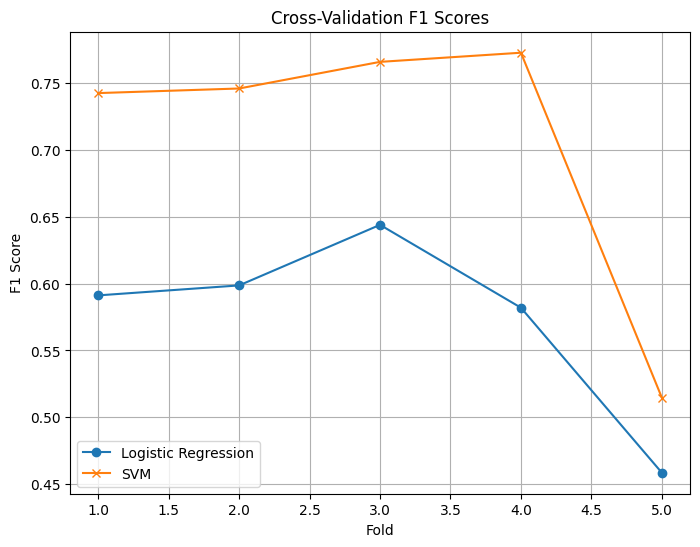

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores_lr, marker='o', label='Logistic Regression')
plt.plot(range(1, 6), cv_scores_svm, marker='x', label='SVM')
plt.title('Cross-Validation F1 Scores')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from wordcloud import WordCloud

In [22]:
positive_text = ' '.join(df[df['Sentiment'] == 0]['Text'])
negative_text = ' '.join(df[df['Sentiment'] == 1]['Text'])
neutral_text = ' '.join(df[df['Sentiment'] == 2]['Text'])

In [23]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

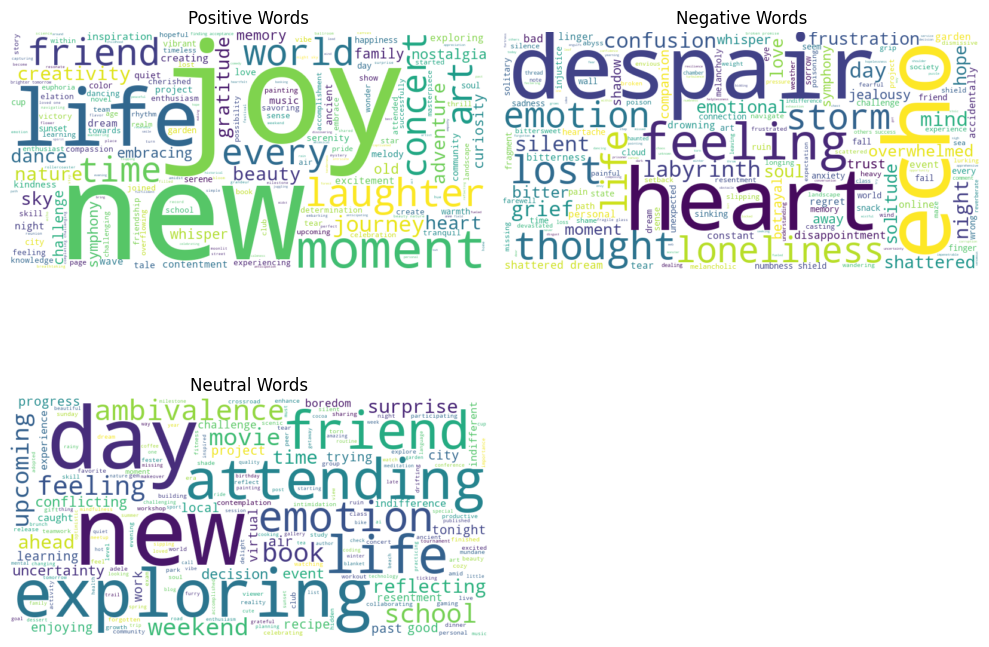

In [24]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title('Neutral Words')
plt.axis('off')

plt.tight_layout()
plt.show()

In [28]:
import pickle
pickle.dump(LR, open('sentiment_model.pkl', 'wb'))  
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))